In [1]:
import os
os.environ["http_proxy"] = '10.41.69.79:13128'
os.environ["https_proxy"] = '10.41.69.79:13128'
from keras.datasets import fashion_mnist
(train60_img, train60_label), (test60_img, test60_label) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
print(train60_img.shape)
print(train60_label.shape)
print(test60_img.shape)
print(test60_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/notebooks/mnist-data/")
train55_img, train55_label = mnist.train.images,mnist.train.labels
test55_img, test55_label = mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /notebooks/mnist-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /notebooks/mnist-data/train-labels-idx1-ubyte.gz
Extracting /notebooks/mnist-data/t10k-images-idx3-ubyte.gz
Extracting /notebooks/mnist-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print(train55_img.shape)
print(train55_label.shape)
print(test55_img.shape)
print(test55_label.shape)

(55000, 784)
(55000,)
(10000, 784)
(10000,)


In [3]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
oh_train60_label = LabelBinarizer().fit(range(max(train60_label)+1)).transform(train60_label)
oh_test60_label = LabelBinarizer().fit(range(max(test60_label)+1)).transform(test60_label)
print(oh_train60_label.shape)
print(oh_train60_label)
print(oh_test60_label.shape)
print(oh_test60_label)

(60000, 10)
[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000, 10)
[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# convert 1 channel to 3 channels
### Train: clroh_trainlabel, clr_trainimg28283
### Test: clroh_testlabel, clr_testimg28283

In [4]:
import numpy as np
import random
clroh_trainlabel = []
clr_trainimg28283 = []
clroh_testlabel = []
clr_testimg28283 = []
train60_clrlabel = []
test60_clrlabel = []
dim = np.zeros((28,28))
#dim.fill(255)

for i in range(len(train60_label)):
    ran = random.randint(10,12)
    #Red
    if ran == 10:
        clr_trainimg28283.append(np.stack((train60_img[i],dim,dim),axis=-1))
        clroh_trainlabel.append((train60_label[i],ran))
        train60_clrlabel.append(0)
    #Green
    if ran == 11:
        clr_trainimg28283.append(np.stack((dim,train60_img[i],dim),axis=-1))
        clroh_trainlabel.append((train60_label[i],ran))
        train60_clrlabel.append(1)
    #Blue
    if ran == 12:
        clr_trainimg28283.append(np.stack((dim,dim,train60_img[i]),axis=-1))
        clroh_trainlabel.append((train60_label[i],ran))
        train60_clrlabel.append(2)
        
for i in range(len(test60_label)):
    ran = random.randint(10,12)
    #Red
    if ran == 10:
        clr_testimg28283.append(np.stack((test60_img[i],dim,dim),axis=-1))
        clroh_testlabel.append((test60_label[i],ran))
        test60_clrlabel.append(0)
    #Green
    if ran == 11:
        clr_testimg28283.append(np.stack((dim,test60_img[i],dim),axis=-1))
        clroh_testlabel.append((test60_label[i],ran))
        test60_clrlabel.append(1)
    #Blue
    if ran == 12:
        clr_testimg28283.append(np.stack((dim,dim,test60_img[i]),axis=-1))
        clroh_testlabel.append((test60_label[i],ran))
        test60_clrlabel.append(2)

clr_trainimg28283 = np.asarray(clr_trainimg28283,dtype=np.float32)
clr_testimg28283 = np.asarray(clr_testimg28283,dtype=np.float32)
test60_clrlabel = np.int_(test60_clrlabel,dtype=np.uint8)
train60_clrlabel = np.int_(train60_clrlabel,dtype=np.uint8)
mlb = MultiLabelBinarizer()
clroh_trainlabel = mlb.fit_transform(clroh_trainlabel)
clroh_testlabel = mlb.fit_transform(clroh_testlabel)


In [5]:
clr_trainimg32323 = []
clr_testimg32323 = []
for i in range(clr_trainimg28283.shape[0]):
    mid = []
    for j in range(clr_trainimg28283.shape[3]):
        mid.append(np.pad(clr_trainimg28283[i][:,:,j],(0,4),mode='constant',constant_values=0))
    clr_trainimg32323.append(np.stack((mid[0],mid[1],mid[2]),axis=-1))
for i in range(clr_testimg28283.shape[0]):
    mid = []
    for j in range(clr_testimg28283.shape[3]):
        mid.append(np.pad(clr_testimg28283[i][:,:,j],(0,4),mode='constant',constant_values=0))
    clr_testimg32323.append(np.stack((mid[0],mid[1],mid[2]),axis=-1))
    
clr_trainimg32323 = np.asarray(clr_trainimg32323,dtype=np.float32)
clr_testimg32323 = np.asarray(clr_testimg32323,dtype=np.float32)

In [6]:
clr_trainimg28283 = clr_trainimg28283/255
clr_testimg28283 = clr_testimg28283/255
clr_testimg32323 = clr_testimg32323/255
clr_trainimg32323 = clr_trainimg32323/255

In [7]:
train60_clrlabel

array([1, 2, 0, ..., 2, 2, 1])

In [8]:
train60_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
print(mlb.classes_)
print(clroh_trainlabel)
print(mlb.inverse_transform(clroh_trainlabel))

[0 1 2 3 4 5 6 7 8 9 10 11 12]
[[0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
[(9, 11), (0, 12), (0, 10), (3, 11), (0, 10), (2, 11), (7, 11), (2, 12), (5, 11), (5, 10), (0, 12), (9, 12), (5, 10), (5, 12), (7, 10), (9, 12), (1, 11), (0, 10), (6, 10), (4, 11), (3, 11), (1, 10), (4, 11), (8, 10), (4, 11), (3, 12), (0, 11), (2, 10), (4, 10), (4, 11), (5, 11), (3, 11), (6, 10), (6, 12), (0, 11), (8, 10), (5, 11), (2, 12), (1, 12), (6, 12), (6, 10), (7, 11), (9, 11), (5, 10), (9, 10), (2, 11), (7, 11), (3, 10), (0, 12), (3, 12), (3, 10), (3, 12), (7, 11), (2, 11), (2, 11), (6, 12), (6, 10), (8, 10), (3, 11), (3, 11), (5, 12), (0, 12), (5, 11), (5, 11), (0, 11), (2, 12), (0, 11), (0, 12), (4, 12), (1, 10), (3, 11), (1, 10), (6, 10), (3, 10), (1, 10), (4, 12), (4, 12), (6, 11), (1, 11), (9, 12), (1, 10), (3, 12), (5, 10), (7, 10), (9, 11), (7, 11), (1, 11), (7, 12), (9, 12), (9, 10), (9, 11), (3, 12), (2, 11), (9, 10), (3

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


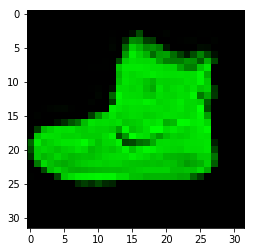

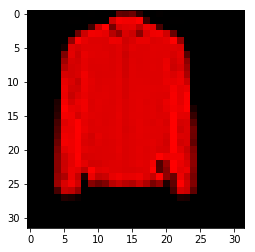

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(clr_trainimg32323[0])

plt.figure()
plt.imshow(clr_testimg32323[205])


print(clr_trainimg32323[0][:,:,2][0])

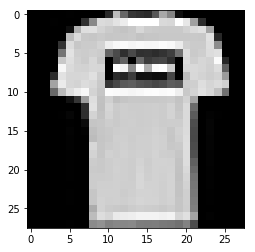

In [11]:
## plt.figure()
plt.imshow(train60_img[1],cmap="gray")

# MultiClass (MobileNet) (1Output)

In [13]:
import keras
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,Input,BatchNormalization,Flatten
from keras.callbacks import EarlyStopping
from keras.constraints import max_norm,unit_norm,min_max_norm
import keras.backend
keras.backend.clear_session

<function keras.backend.tensorflow_backend.clear_session()>

In [14]:
os.environ["http_proxy"]='10.41.69.79:13128'
os.environ["https_proxy"]='10.41.69.79:13128'
input_tensor = Input(shape=(32,32,3),name='inputis_32323')
base_model = MobileNet(weights='imagenet',input_tensor=input_tensor,include_top=False)
for layer in base_model.layers:
    layer.trainable=True
# for layer in base_model.layers[:50]:
#     layer.trainable=False  
base_model.summary()

/usr/local/lib/python3.5/dist-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputis_32323 (InputLayer)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128       
__________

In [15]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(1024,activation='relu',name='Dense1')(x)
x = Dense(512,activation='relu',kernel_constraint=unit_norm(),name='Dense2')(x)
#x = Dropout(0.5)(x)
#x = Dense(512,activation='relu',name='Dense3')(x)
preds = Dense(13,activation='softmax',kernel_constraint=unit_norm(),name='FinalDense')(x)
MobileModel1 = Model(inputs=base_model.input,outputs=preds)
MobileModel1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputis_32323 (InputLayer)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128       
__________

In [16]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
MobileModel1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = MobileModel1.fit(x=clr_trainimg32323,y=clroh_trainlabel,validation_split=0.1,verbose=1,epochs=1000,batch_size=200,callbacks=[es])


Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 10s 177us/step - loss: 1.9903 - acc: 0.3433 - val_loss: 1.7807 - val_acc: 0.4937
Epoch 2/1000
54000/54000 [==============================] - 6s 116us/step - loss: 1.6848 - acc: 0.3662 - val_loss: 1.7066 - val_acc: 0.3308
Epoch 3/1000
54000/54000 [==============================] - 6s 116us/step - loss: 1.6327 - acc: 0.3705 - val_loss: 1.6662 - val_acc: 0.2712
Epoch 4/1000
54000/54000 [==============================] - 6s 116us/step - loss: 1.6101 - acc: 0.3772 - val_loss: 1.6728 - val_acc: 0.5143
Epoch 5/1000
54000/54000 [==============================] - 6s 117us/step - loss: 1.5879 - acc: 0.3850 - val_loss: 1.6718 - val_acc: 0.3008
Epoch 6/1000
54000/54000 [==============================] - 6s 116us/step - loss: 1.5712 - acc: 0.3866 - val_loss: 1.6305 - val_acc: 0.4447
Epoch 7/1000
54000/54000 [==============================] - 6s 117us/step - loss: 1.5604 - acc: 0.3895 - val_l

In [17]:
loss, acc = MobileModel1.evaluate(clr_testimg32323,clroh_testlabel)
acc

10000/10000 [==============================] - 1s 120us/step


0.5014

In [123]:
def show_train_history(train_history, train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

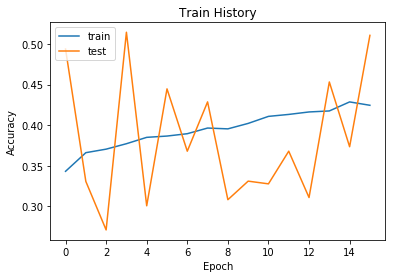

In [19]:
show_train_history(history1, 'acc', 'val_acc')

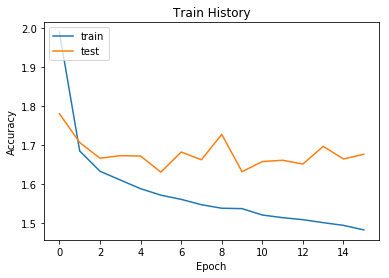

In [20]:
show_train_history(history1,'loss','val_loss')

# MultiClass (MobileNet) (2 Output)

In [18]:
keras.backend.clear_session()
os.environ["http_proxy"]='10.41.69.79:13128'
os.environ["https_proxy"]='10.41.69.79:13128'
input_tensor = Input(shape=(32,32,3),name='inputis_32323')
base_model = MobileNet(weights='imagenet',input_tensor=input_tensor,include_top=False)
for layer in base_model.layers:
    layer.trainable=True
# for layer in base_model.layers[:50]:
#     layer.trainable=False
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputis_32323 (InputLayer)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128       
__________

In [19]:
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

# colorx = Dense(128,activation='relu',kernel_constraint=unit_norm(),name='color_dense_1')(x2)
# colorx = BatchNormalization()(colorx)
# colorx = Dropout(0.5)(colorx)
colorx = Dense(3,activation='softmax',kernel_constraint=unit_norm(),name='Color_Classify')(x2)

# typex = Dense(512,activation='relu',kernel_constraint=unit_norm(),name='type_dense_1')(x2)
# typex = BatchNormalization()(typex)
# typex = Dropout(0.25)(typex)
typex = Dense(10,activation='softmax',kernel_constraint=unit_norm(),name='Type_Classify')(x2)

MobileModel2 = Model(inputs=base_model.input,outputs=[typex,colorx])
MobileModel2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputis_32323 (InputLayer)      (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           inputis_32323[0][0]              
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 32)   864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 32)   128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

In [29]:
history2 = []
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
for idx in range(3):
    weightoftype = 0.7+0.1*idx
    MobileModel2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',loss_weights=[weightoftype,1-weightoftype],metrics=['acc'])
    history2.append(MobileModel2.fit(x=clr_trainimg32323,y=[train60_label,train60_clrlabel],validation_split=0.1,epochs=1000,batch_size=150,verbose=1,callbacks=[es]))
    print('weightofType: '+str(weightoftype))
    print('Evaluate:')
    print(MobileModel2.evaluate(x=clr_testimg32323,y=[test60_label,test60_clrlabel]))

# MobileModel2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
# history2 = MobileModel2.fit(x=clr_trainimg32323,y=[train60_label,train60_clrlabel],validation_split=0.1,epochs=1000,batch_size=100,verbose=1,callbacks=[es])
    

Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 12s 217us/step - loss: 0.3642 - Type_Classify_loss: 0.4942 - Color_Classify_loss: 0.0609 - Type_Classify_acc: 0.8290 - Color_Classify_acc: 0.9780 - val_loss: 0.2565 - val_Type_Classify_loss: 0.3650 - val_Color_Classify_loss: 0.0031 - val_Type_Classify_acc: 0.8760 - val_Color_Classify_acc: 0.9995
Epoch 2/1000
54000/54000 [==============================] - 8s 147us/step - loss: 0.2052 - Type_Classify_loss: 0.2899 - Color_Classify_loss: 0.0076 - Type_Classify_acc: 0.8970 - Color_Classify_acc: 0.9981 - val_loss: 0.2493 - val_Type_Classify_loss: 0.3101 - val_Color_Classify_loss: 0.1075 - val_Type_Classify_acc: 0.8950 - val_Color_Classify_acc: 0.9712
Epoch 3/1000
54000/54000 [==============================] - 8s 147us/step - loss: 0.1775 - Type_Classify_loss: 0.2516 - Color_Classify_loss: 0.0046 - Type_Classify_acc: 0.9105 - Color_Classify_acc: 0.9989 - val_loss: 0.2029 - val_Type_Cla

Epoch 00023: early stopping
weightofType: 0.7
Evaluate:
10000/10000 [==============================] - 1s 115us/step
[0.2511230015370995, 0.3587405718840659, 1.534835180336813e-05, 0.9198, 1.0]
Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 12s 223us/step - loss: 0.0547 - Type_Classify_loss: 0.0680 - Color_Classify_loss: 0.0016 - Type_Classify_acc: 0.9778 - Color_Classify_acc: 0.9996 - val_loss: 0.2681 - val_Type_Classify_loss: 0.3351 - val_Color_Classify_loss: 4.3009e-04 - val_Type_Classify_acc: 0.9200 - val_Color_Classify_acc: 1.0000
Epoch 2/1000
54000/54000 [==============================] - 8s 149us/step - loss: 0.0488 - Type_Classify_loss: 0.0603 - Color_Classify_loss: 0.0029 - Type_Classify_acc: 0.9809 - Color_Classify_acc: 0.9994 - val_loss: 0.3235 - val_Type_Classify_loss: 0.4044 - val_Color_Classify_loss: 4.0210e-05 - val_Type_Classify_acc: 0.9177 - val_Color_Classify_acc: 1.0000
Epoch 3/1000
54000/54000 [==========

Color


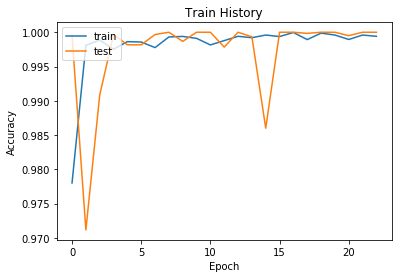

Type


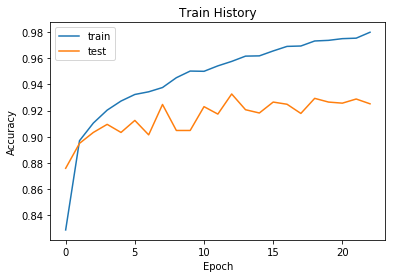

Color


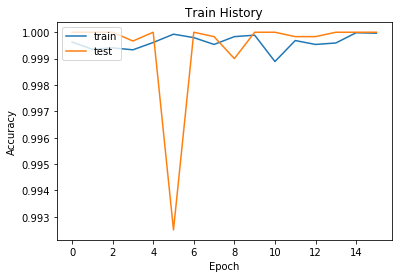

Type


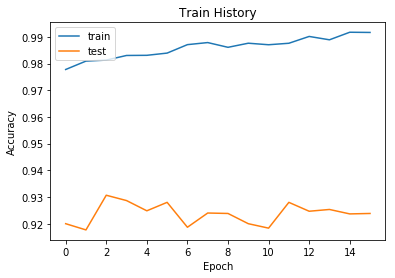

Color


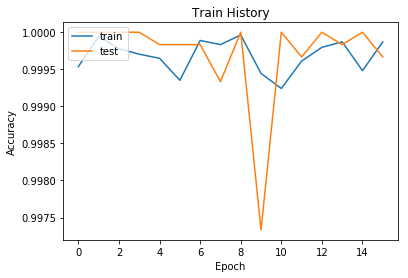

Type


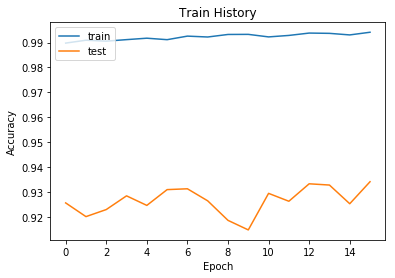

In [34]:
for i in range(len(history2)):
    print('Color')
    show_train_history(history2[i],'Color_Classify_acc','val_Color_Classify_acc')
    print('Type')
    show_train_history(history2[i],'Type_Classify_acc','val_Type_Classify_acc')

In [20]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
MobileModel2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',loss_weights=[1.,0.2],metrics=['acc'])
history3 = MobileModel2.fit(x=clr_trainimg32323,y=[train60_label,train60_clrlabel],validation_split=0.1,epochs=1000,batch_size=200,verbose=1,callbacks=[es])


Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 9s 166us/step - loss: 0.5122 - Type_Classify_loss: 0.4920 - Color_Classify_loss: 0.1012 - Type_Classify_acc: 0.8309 - Color_Classify_acc: 0.9660 - val_loss: 0.4345 - val_Type_Classify_loss: 0.4303 - val_Color_Classify_loss: 0.0210 - val_Type_Classify_acc: 0.8722 - val_Color_Classify_acc: 0.9950
Epoch 2/1000
54000/54000 [==============================] - 6s 116us/step - loss: 0.2790 - Type_Classify_loss: 0.2766 - Color_Classify_loss: 0.0119 - Type_Classify_acc: 0.9011 - Color_Classify_acc: 0.9981 - val_loss: 0.2990 - val_Type_Classify_loss: 0.2982 - val_Color_Classify_loss: 0.0041 - val_Type_Classify_acc: 0.9015 - val_Color_Classify_acc: 0.9997
Epoch 3/1000
54000/54000 [==============================] - 6s 116us/step - loss: 0.2338 - Type_Classify_loss: 0.2324 - Color_Classify_loss: 0.0074 - Type_Classify_acc: 0.9171 - Color_Classify_acc: 0.9987 - val_loss: 0.2957 - val_Type_Clas

In [21]:
acc = MobileModel2.evaluate(x=clr_testimg32323,y=[test60_label,test60_clrlabel])
acc

10000/10000 [==============================] - 1s 126us/step


[0.290930316413939, 0.28664588049501183, 0.02142218344411813, 0.9157, 0.9931]

In [22]:
def plot_image_label_prediction(images, labels1,labels2, prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,12)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title = 'Labels:'+str(labels1[idx])+','+str(labels2[idx])
        if(len(prediction)>0):        
            title+='-> Prediction:'+str(np.argmax(prediction[0][idx]))+','+str(np.argmax(prediction[1][idx]))
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

In [24]:
predict_class_color = []
predict_class_type = []
prediction_class = MobileModel2.predict(clr_testimg32323)
for i in range(len(test60_clrlabel)):
    predict_class_color.append(np.argmax(prediction_class[1][i]))
    predict_class_type.append(np.argmax(prediction_class[0][i]))
predict_class_color = np.int_(predict_class_color,dtype=np.uint8)
predict_class_type = np.int_(predict_class_type,dtype=np.uint8)

In [25]:
import pandas as pd

In [26]:
pd.crosstab(test60_clrlabel,predict_class_color,rownames=['labels'],colnames=['prediction'])

prediction,0,1,2
labels,,,
0,3345,0,0
1,1,3323,0
2,62,6,3263


In [27]:
pd.crosstab(test60_label,predict_class_type,rownames=['labels'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,869,1,29,20,2,1,66,0,11,1
1,1,991,1,4,1,0,0,0,2,0
2,11,1,922,2,25,0,38,0,1,0
3,21,6,28,893,31,0,17,0,4,0
4,1,0,63,22,860,0,51,0,3,0
5,0,0,0,0,0,969,0,28,0,3
6,104,1,79,29,52,0,726,0,9,0
7,0,0,0,0,0,3,0,965,0,32
8,1,1,1,2,0,2,0,1,992,0


# Data Augmentation

In [130]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)
datagen.fit(clr_trainimg32323)
timg32323 = []
for idx in range(clr_trainimg32323.shape[0]):
    timg32323.append(next(datagen.flow(clr_trainimg32323[idx].reshape(1,32,32,3)))[0])
    
timg32323 = np.asarray(timg32323,dtype=np.float32)


# MobileModel2.fit_generator(datagen.flow(clr_trainimg32323, ,batch_size=32),steps_per_epoch=clr_trainimg32323.shape[0] / 32, epochs=100)


In [139]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)
datagen.fit(clr_testimg32323)
ttimg32323 = []
for idx in range(clr_testimg32323.shape[0]):
    ttimg32323.append(next(datagen.flow(clr_testimg32323[idx].reshape(1,32,32,3)))[0])
    
ttimg32323 = np.asarray(ttimg32323,dtype=np.float32)

In [143]:
keras.backend.clear_session

<function keras.backend.tensorflow_backend.clear_session()>

In [145]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
MobileModel2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',loss_weights=[1.,0.1],metrics=['acc'])
historyafterAug = MobileModel2.fit(x=timg32323,y=[train60_label,train60_clrlabel],validation_split=0.1,epochs=1000,batch_size=100,verbose=1,callbacks=[es])


Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 16s 290us/step - loss: 0.0432 - Type_Classify_loss: 0.0415 - Color_Classify_loss: 0.0175 - Type_Classify_acc: 0.9882 - Color_Classify_acc: 0.9959 - val_loss: 0.3135 - val_Type_Classify_loss: 0.3128 - val_Color_Classify_loss: 0.0066 - val_Type_Classify_acc: 0.9250 - val_Color_Classify_acc: 0.9990
Epoch 2/1000
54000/54000 [==============================] - 11s 196us/step - loss: 0.0439 - Type_Classify_loss: 0.0428 - Color_Classify_loss: 0.0116 - Type_Classify_acc: 0.9871 - Color_Classify_acc: 0.9977 - val_loss: 0.2862 - val_Type_Classify_loss: 0.2859 - val_Color_Classify_loss: 0.0025 - val_Type_Classify_acc: 0.9280 - val_Color_Classify_acc: 0.9997
Epoch 3/1000
54000/54000 [==============================] - 11s 198us/step - loss: 0.0393 - Type_Classify_loss: 0.0386 - Color_Classify_loss: 0.0063 - Type_Classify_acc: 0.9878 - Color_Classify_acc: 0.9988 - val_loss: 0.3130 - val_Type_C

In [146]:
acc = MobileModel2.evaluate(ttimg32323,[test60_label,test60_clrlabel])
acc

10000/10000 [==============================] - 2s 153us/step


[0.4377952804297209, 0.43771770854517816, 0.0007757257082033902, 0.9131, 1.0]

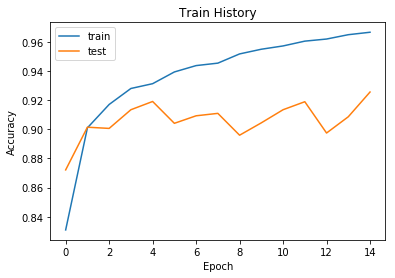

In [147]:
show_train_history(history3,'Type_Classify_acc','val_Type_Classify_acc')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

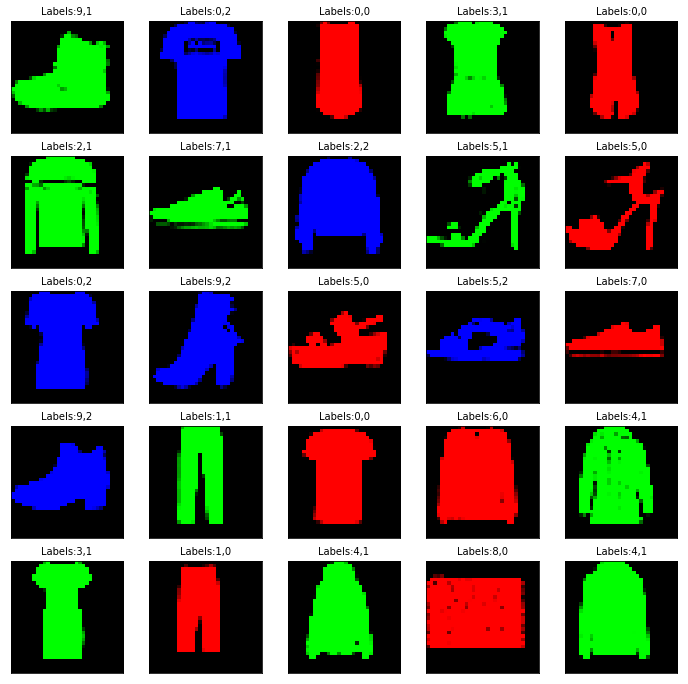

In [131]:
plot_image_label_prediction(timg32323,train60_label,train60_clrlabel,[],0,25)

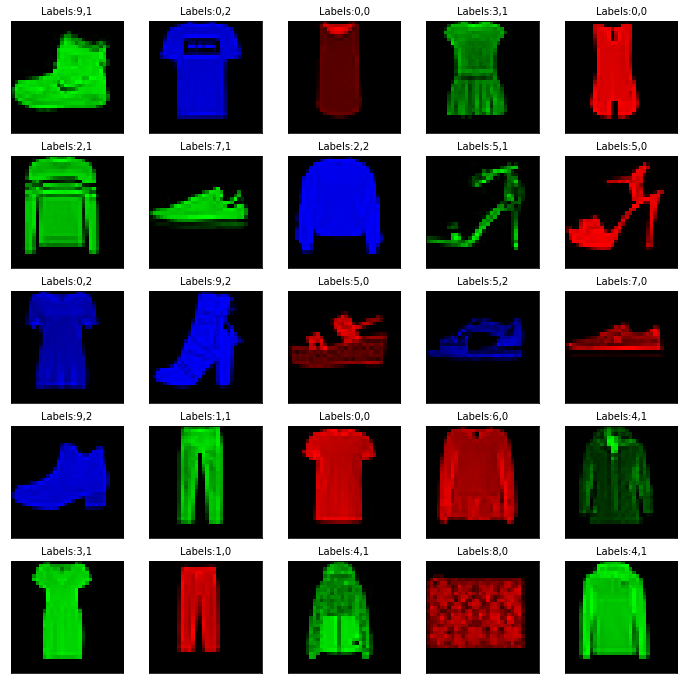

In [119]:
plot_image_label_prediction(clr_trainimg32323,train60_label,train60_clrlabel,[],0,25)

# Try Downloaded Data

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


bag.jpeg
8
1
sneaker.jpeg
5
0
coat.jpeg
3
0
dress.png
1
1
dress2.png
3
0


[array([[3.3314318e-10, 3.2913807e-11, 1.6632728e-11, 2.2391071e-09,
        1.0604037e-10, 2.6783312e-10, 4.8352584e-09, 4.8371149e-08,
        1.0791128e-08, 1.0000000e+00]], dtype=float32), array([[1.0000000e+00, 5.5292499e-08, 3.1894757e-08]], dtype=float32)]
Color:0 Type:9


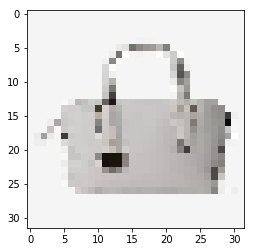

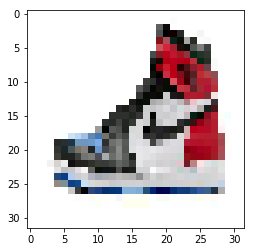

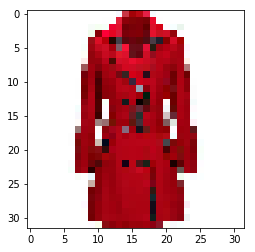

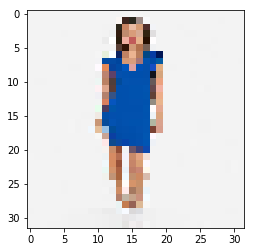

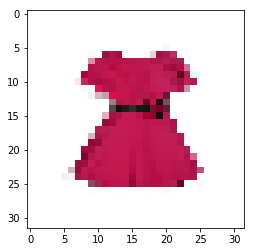

In [30]:
import numpy as np
from keras.preprocessing import image
def predictrgb(model, img):
    plt.figure()
    plt.imshow(img)
    x = image.img_to_array(img)
    #x = np.mean(x, axis=2)
    x = x.reshape(1,x.shape[0],x.shape[1],3).astype('float32')
    #x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(np.argmax(preds[0]))
    print(np.argmax(preds[1]))
    #print(np.int_(np.argmax(preds),dtype=np.uint8))
    return preds

label_dict={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
for i in range(len(label_dict)):
    print(i,label_dict[i])
print('\n')

for root,dirs,files in os.walk('/notebooks/notebook/fashion_test/'):
    for file in files:
        print(file)
        img = image.load_img(os.path.join(root,file), target_size=(32, 32))
        #img_rgb = image.img_to_array(img)
        #img_gray = np.mean(img_rgb, axis=2)
        #img_gray = img_gray.reshape(1,32,32,1).astype('float32')
        #print(img_gray.shape)
        predictrgb(MobileModel2, img)

print('\n')
print(MobileModel2.predict(clr_testimg32323[0].reshape(1,32,32,3).astype('float32')))
print('Color:'+str(test60_clrlabel[0])+' Type:'+str(test60_label[0]))